In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('datasets/cleaned_soccer_data_120K.csv')

In [3]:
cols = ['pace', 'shooting', 'passing', 
                'dribbling', 'defending', 'physic', 'player_positions_general']

In [4]:
df_subset = df.query('fifa==16')[cols]

In [5]:
df_subset = df_subset.query("player_positions_general!='GK'")

In [6]:
df_subset = df_subset.reset_index(drop=True)

(-0.5, 2.5, 17.25, 99.75)

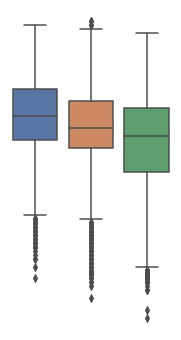

In [7]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(x=df_subset["player_positions_general"], y=df_subset["pace"])
plt.axis('off')

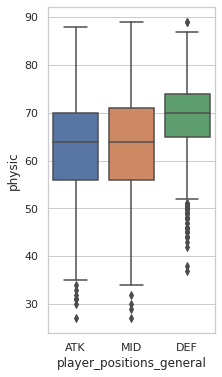

In [8]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(x=df_subset["player_positions_general"], y=df_subset["physic"])

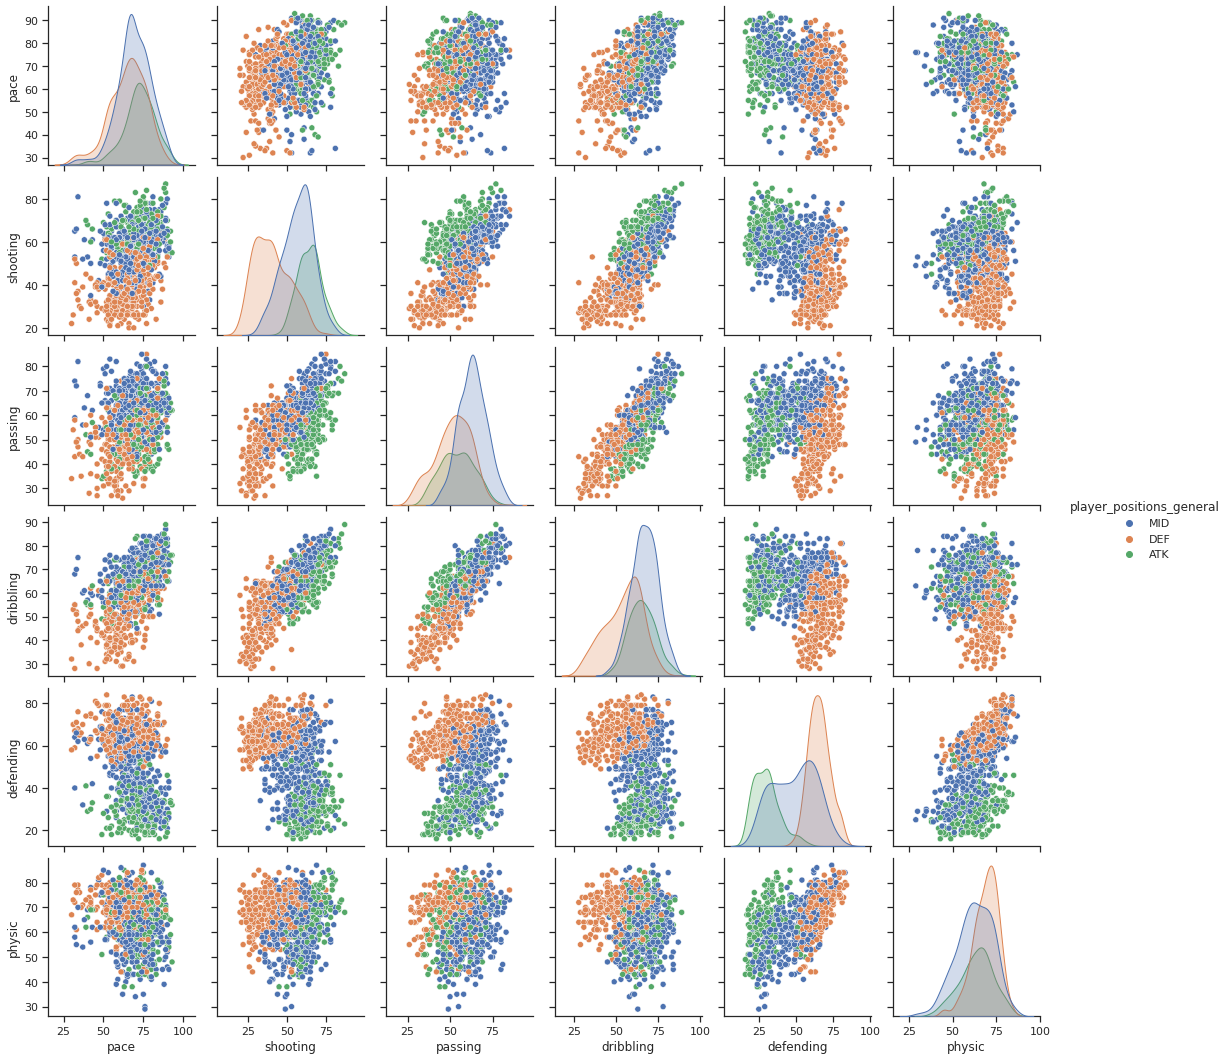

In [9]:
sns.set_theme(style="ticks")

sns.pairplot(data=df_subset.sample(1000), hue="player_positions_general")

In [10]:
def draw_pitch(pitch, line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if view.lower().startswith("h"):
        fig,ax = plt.subplots(figsize=(20.8, 13.6))
        plt.ylim(98, 210)
        plt.xlim(-2, 138)
    else:
        fig,ax = plt.subplots(figsize=(13.6, 20.8))
        plt.ylim(-2, 210)
        plt.xlim(-2, 138)
    ax.axis('off')

    # side and goal lines
    lx1 = [0, 0, 136, 136, 0]
    ly1 = [0, 208, 208, 0, 0]

    plt.plot(lx1,ly1,color=line,zorder=5)

    # boxes, 6 yard box and goals
    # outer boxes
    lx2 = [27.68, 27.68, 108.32, 108.32] 
    ly2 = [208, 175, 175, 208]
    plt.plot(lx2,ly2,color=line,zorder=5)

    lx3 = [27.68, 27.68, 108.32, 108.32] 
    ly3 = [0, 33, 33, 0]
    plt.plot(lx3,ly3,color=line,zorder=5)

    # goals
    lx4 = [60.68, 60.68, 75.32, 75.32]
    ly4 = [208, 208.4, 208.4, 208]
    plt.plot(lx4,ly4,color=line,zorder=5)

    lx5 = [60.68, 60.68, 75.32, 75.32]
    ly5 = [0, -0.4, -0.4, 0]
    plt.plot(lx5,ly5,color=line,zorder=5)

    # 6 yard boxes
    lx6 = [49.68, 49.68, 86.32, 86.32]
    ly6 = [208, 199, 199, 208]
    plt.plot(lx6,ly6,color=line,zorder=5)

    lx7 = [49.68, 49.68, 86.32, 86.32]
    ly7 = [0, 9, 9, 0]
    plt.plot(lx7,ly7,color=line,zorder=5)

    # Halfway line, penalty spots, and kickoff spot
    lx8 = [0, 136] 
    ly8 = [104, 104]
    plt.plot(lx8,ly8,color=line,zorder=5)

    plt.scatter(68, 186, color=line, zorder=5)
    plt.scatter(68, 22, color=line, zorder=5)
    plt.scatter(68, 104, color=line, zorder=5)

    circle1 = plt.Circle((68, 187), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=1, alpha=1)
    circle2 = plt.Circle((68, 21), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=1, alpha=1)
    circle3 = plt.Circle((68, 104), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=2, alpha=1)

    rec1 = plt.Rectangle((40, 175), 60, 33, ls='-', color=pitch, zorder=1, alpha=1)
    rec2 = plt.Rectangle((40, 0), 60, 33, ls='-', color=pitch, zorder=1, alpha=1)
    rec3 = plt.Rectangle((-1, -1), 140, 212, ls='-', color=pitch, zorder=1, alpha=1)

    ax.add_artist(rec3)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)   



In [11]:
x = [68, 68, 68, 32, 104, 68, 32, 104, 68, 44, 88, 20, 116, 12, 124, 68, 68, 16, 120, 16, 120, 40, 96, 32, 104, 32, 104]
y = [186, 150, 1, 150, 150, 112, 114, 114, 14, 16, 16, 24, 24, 50, 50, 50, 74, 74, 74, 130, 130, 74, 74, 186, 186, 50, 50]
n = [
    'ST', 'CF', 'GK', 'LF', 'RF', 'CAM', 'LAM', 'RAM', 'CB', 
    'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB', 'CDM', 'CM', 'LM', 
    'RM', 'LW', 'RW', 'LCM', 'RCM', 'LS', 'RS', 'LDM', 'RDM'
]

In [20]:
df = df.query('fifa==16').reset_index(drop=True)

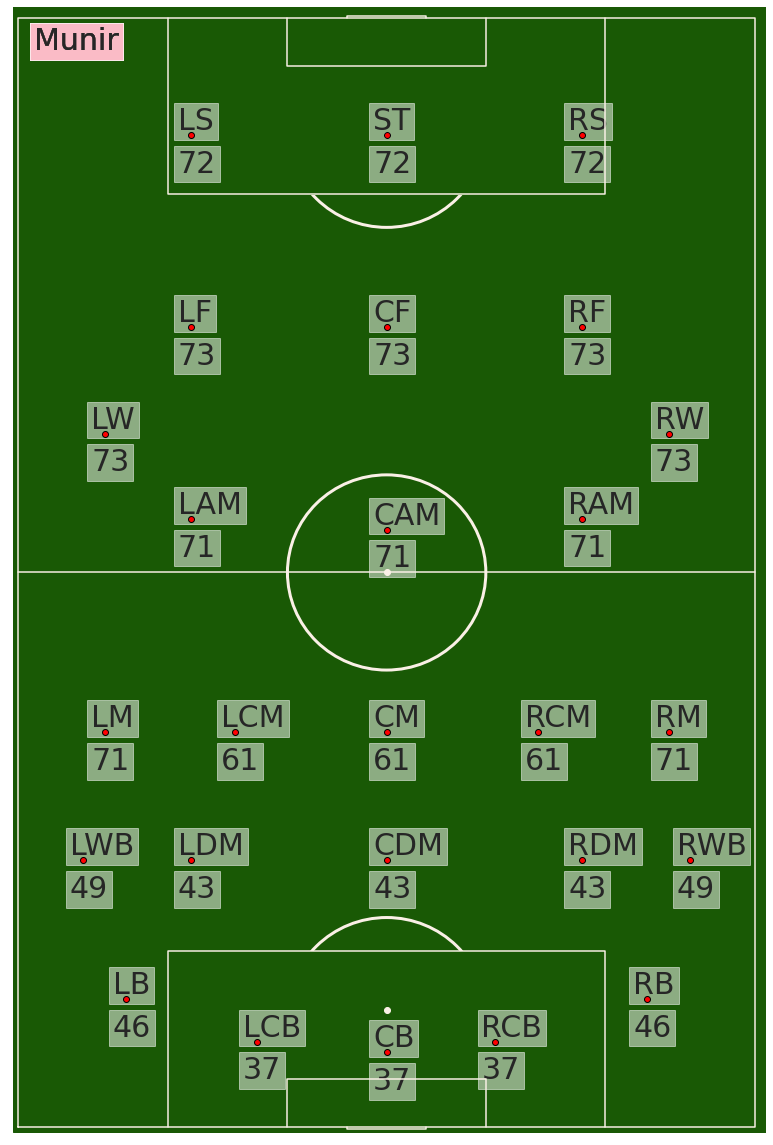

In [23]:
draw_pitch("#195905", "#faf0e6", "v", "full")
name = df.iloc[2059]["short_name"]
r = df.iloc[2059][[n_.lower() for n_ in n]].to_list()
for i, pos in enumerate(n):
    if pos == 'GK':
        continue
    x_c = x[i]
    y_c = y[i]
    plt.scatter(x_c, y_c, marker='o', color='red', edgecolors="black", zorder=10)
    plt.text(x_c-2.5, y_c+1, pos, fontsize=30, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(x_c-2.5, y_c-7, r[i], fontsize=30, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(3, 202, name, fontsize=30, bbox=dict(facecolor='pink', alpha=0.2))

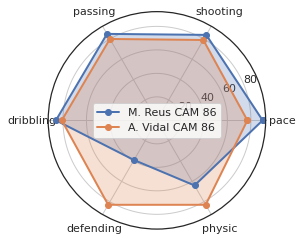

In [24]:
labels=np.array(['pace', 'shooting', 'passing', 
                'dribbling', 'defending', 'physic'])


stats=df.loc[30,labels].values


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label='M. Reus CAM 86')
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

stats=df.loc[37,labels].values


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2, label='A. Vidal CAM 86')
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
plt.legend()